In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from kbr import KBRInterpolator as KBR

# Set random seed for reproducibility
np.random.seed(10)

def Camel1D(X):
    F =  np.zeros(len(X))
    dim   = 1
    sigma = 0.2
    a     = 1/3.
    b     = 2/3.
    a1 = (X-a)**2 
    b1 = (X-b)**2 
    F = 0.5*( np.exp(-a1/sigma**2) + np.exp(-b1/sigma**2) ) / (sigma * np.pi**0.5)**dim
    return F

# Generate random training data
num_points = 100
x_train = np.sort(np.random.rand(num_points))  # Random points in [0,1]
f_train = Camel1D(x_train) #+ np.random.normal(0, 0.1, num_points)  # Add some noise

# Normalize data
scale = np.max(np.abs(f_train))
f_train_norm = f_train / scale

# Prepare training data
train_data = np.column_stack([x_train, f_train_norm])

# Split into train/test
train_set, test_set = train_test_split(train_data, test_size=0.2, shuffle=True)

# Create validation grid
grid_size = 10000
X_grid = np.sort(np.random.rand(grid_size))


# True function values on grid
f_true = Camel1D(X_grid)
f_true_norm = f_true / scale

# Prepare validation data
validation_data = np.column_stack([X_grid.ravel(), f_true_norm.ravel()])

# Train models
print("Training models...")
kbr_basic = KBR()
kbr_corrected = KBR()

kbr_basic.fit(train_set, test_set, apply_correction=False)
kbr_corrected.fit(train_set, test_set, apply_correction=True)

# Make predictions
pred_basic = kbr_basic.predict(validation_data)
pred_corrected = kbr_corrected.predict(validation_data)

# Reshape predictions back to grid and rescale
pred_basic_1d     = (pred_basic     * scale)
pred_corrected_1d = (pred_corrected * scale)

# Calculate errors
error_basic     = pred_basic_1d     - f_true 
error_corrected = pred_corrected_1d - f_true 

Training models...
Optimizing theta
Best theta: 6.400022631651425e-06, RMSE: 0.009804924631225585
Optimizing theta
Best theta: 0.00017763460688064166, RMSE: 0.0009600182319393064
Prediction completed.
Prediction completed.


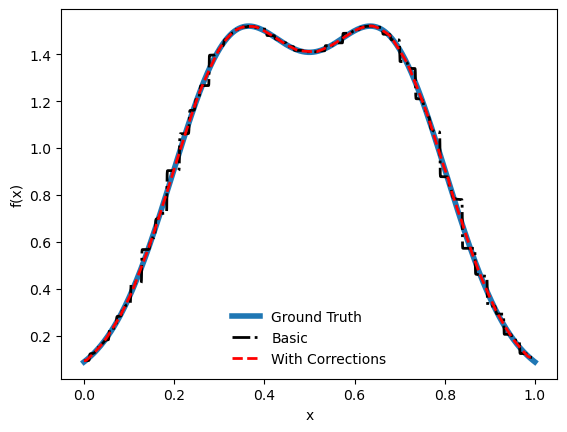


Error Statistics:
Basic - Max Error: 1.00e-01
Basic - RMS Error: 2.46e-02
With Corrections - Max Error: 1.85e-02
With Corrections - RMS Error: 2.08e-03


In [2]:
plt.plot(X_grid, f_true           ,'-' , color="C0", lw=4, label='Ground Truth')
plt.plot(X_grid, pred_basic_1d    ,'-.', color="k", lw=2, label='Basic')
plt.plot(X_grid, pred_corrected_1d,'--' , color="r", lw=2, label='With Corrections')

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend(frameon=False)
plt.show()


print(f"\nError Statistics:")
print(f"Basic - Max Error: {np.max(np.abs(error_basic)):.2e}")
print(f"Basic - RMS Error: {np.sqrt(np.mean(error_basic**2)):.2e}")
print(f"With Corrections - Max Error: {np.max(np.abs(error_corrected)):.2e}")
print(f"With Corrections - RMS Error: {np.sqrt(np.mean(error_corrected**2)):.2e}")